# Load Data

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/S4025371/Downloads/edge-iiotset/Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv')


C:\Users\S4025371\AppData\Local\Temp\ipykernel_43164\2240222448.py:6: DtypeWarning:

Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.



# Visualize Data

In [ ]:
df.head(n=10)

In [ ]:
df.tail()

In [39]:
df.describe()

arp.opcode    arp.hw.size  icmp.checksum    icmp.seq_le  \
count  157800.000000  157800.000000  157800.000000  157800.000000   
mean        0.014195       0.059848    3047.291838    3239.979778   
std         0.149783       0.596245   11144.328203   11406.072994   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         2.000000       6.000000   65532.000000   65524.000000   

       http.content_length  http.response       tcp.ack   tcp.ack_raw  \
count        157800.000000  157800.000000  1.578000e+05  1.578000e+05   
mean             14.715520       0.045748  7.160039e+07  1.358347e+09   
std             229.659671       0.208938  3.101231e+08  1.295523e+09   
min               0.000000       0.000000  0.000000e+00  0.000000e+00   
25%               0.000000       0.000000  0.000000e+00  0.000000e+00   
50%               0.000000       0.000000  1.000000e+00  1.160051e+09   
75%               0.000000       0.000000  4.790000e+02  2.372228e+09   
max           83655.000000       1.000000  2.147333e+09  4.294947e+09   

        tcp.checksum  tcp.connection.fin  ...  mqtt.conflag.cleansess  \
count  157800.000000       157800.000000  ...           157800.000000   
mean    25796.599163            0.058143  ...                0.007921   
std     21513.031052            0.234015  ...                0.088649   
min         0.000000            0.000000  ...                0.000000   
25%      2982.000000            0.000000  ...                0.000000   
50%     23906.000000            0.000000  ...                0.000000   
75%     44733.000000            0.000000  ...                0.000000   
max     65535.000000            1.000000  ...                1.000000   

       mqtt.conflags  mqtt.hdrflags       mqtt.len   mqtt.msgtype  \
count  157800.000000  157800.000000  157800.000000  157800.000000   
mean        0.015843       2.581293       0.419341       0.161331   
std         0.177299      20.695242       3.606594       1.293453   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         2.000000     224.000000      39.000000      14.000000   

       mqtt.proto_len  mqtt.topic_len       mqtt.ver  mbtcp.len   Attack_label  
count   157800.000000   157800.000000  157800.000000   157800.0  157800.000000  
mean         0.031686        0.189506       0.031686        0.0       0.846001  
std          0.354598        2.124206       0.354598        0.0       0.360949  
min          0.000000        0.000000       0.000000        0.0       0.000000  
25%          0.000000        0.000000       0.000000        0.0       1.000000  
50%          0.000000        0.000000       0.000000        0.0       1.000000  
75%          0.000000        0.000000       0.000000        0.0       1.000000  
max          4.000000       24.000000       4.000000        0.0       1.000000  

[8 rows x 33 columns]

In [56]:
df.columns

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len

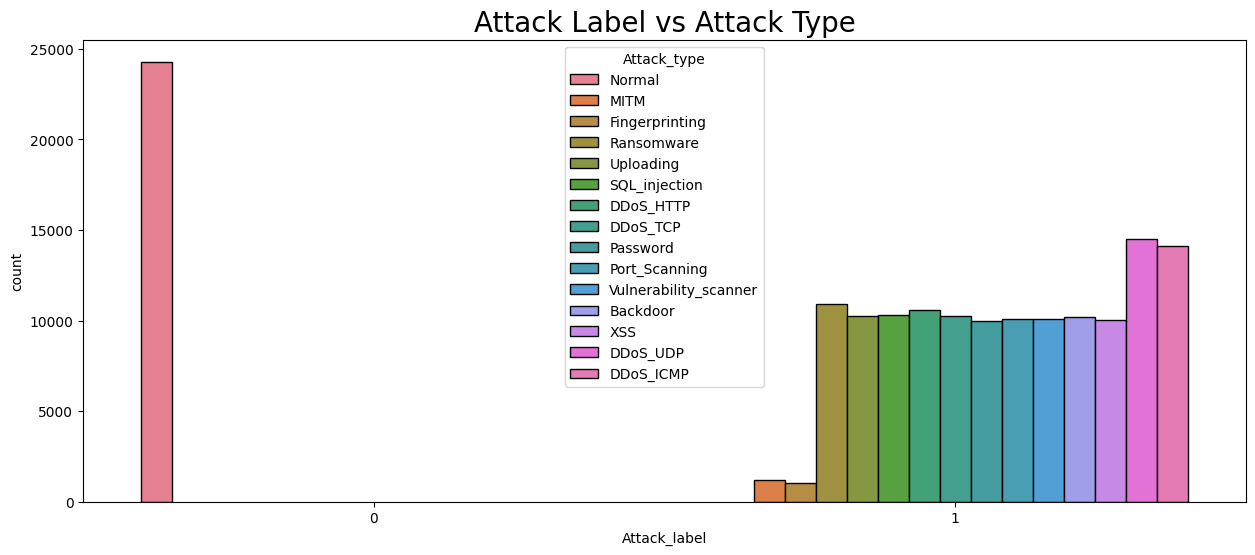

In [7]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Attack_label', hue='Attack_type', edgecolor='black', linewidth=1)
plt.title('Attack Label vs Attack Type', fontsize=20)
plt.show()

In [57]:
import plotly.express as px
fig = px.pie(df, names='Attack_type', title='Distribution of Attack Type')
fig.show()

In [8]:
fig = px.pie(df, names='Attack_label', title='Distribution of Attack Labels')
fig.show()

# Preprocess Data

In [104]:
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4",
                "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg", "icmp.unused", "http.tls_port", 
                'dns.qry.type', 'dns.retransmit_request_in', "mqtt.msg_decoded_as", "mbtcp.trans_id", 
                "mbtcp.unit_id", "http.request.method", "http.referer", "http.request.version", 
                "dns.qry.name.len", "mqtt.conack.flags", "mqtt.protoname", "mqtt.topic"]

print("Number of columns before dropping: ", len(df.columns))
df.drop(drop_columns, axis=1, inplace=True)
print("Number of columns after dropping: ", len(df.columns))

Number of columns before dropping:  63
Number of columns after dropping:  34


In [113]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Attack_label'] = label_encoder.fit_transform(df['Attack_label'])
df['Attack_label'].value_counts()

Attack_label
1    133499
0     24301
Name: count, dtype: int64

In [91]:
# get only attack_type='DDoS_TCP' and attack_type='NORMAL' rows
df_filtered = df[(df['Attack_type'] == 'DDoS_UDP') | (df['Attack_type'] == 'Normal')]
df_filtered['Attack_type'].value_counts()

Attack_type
Normal      24301
DDoS_UDP    14498
Name: count, dtype: int64

In [114]:
from sklearn.model_selection import train_test_split

X = df.drop(['Attack_label', 'Attack_type'], axis=1)
y_label = df['Attack_label']
y_type = df['Attack_type']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train_label, y_test_label = train_test_split(X, y_label, test_size=0.2, random_state=42)
# X_train, X_test, y_train_type, y_test_type = train_test_split(X, y_type, test_size=0.2, random_state=42)

In [120]:
# get 10 samples from the training set that y_train_label=0 (Normal)
X_train_normal = X_train[y_train_label == 0].sample(20)
# output to a csv file
X_train_normal.to_csv('X_train_normal.csv', index=False)

# get 10 samples from the training set that y_train_label=1 (Attack)
X_train_normal = X_train[y_train_label == 1].sample(20)
# output to a csv file
X_train_normal.to_csv('X_train_attack.csv', index=False)

In [107]:
from imblearn.over_sampling import SMOTE

# Resampling the training data
smote = SMOTE(sampling_strategy=1, random_state=42)

X_train_resampled, y_train_label_resampled = smote.fit_resample(X_train, y_train_label)
print(y_train_label.value_counts())
print(y_train_label_resampled.value_counts())

# X_train_resampled, y_train_type_resampled = smote.fit_resample(X_train, y_train_type)
# print(y_train_type.value_counts())
# print(y_train_type_resampled.value_counts())

Attack_label
1    106924
0     19316
Name: count, dtype: int64
Attack_label
1    106924
0    106924
Name: count, dtype: int64


# Evaluate Models

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create an instance of the LogisticRegression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train_resampled, y_train_label_resampled)

# Predict the labels for the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test_label, y_pred))


              precision    recall  f1-score   support

           0       0.21      0.91      0.35      4985
           1       0.96      0.37      0.54     26575

    accuracy                           0.46     31560
   macro avg       0.59      0.64      0.44     31560
weighted avg       0.84      0.46      0.51     31560



In [109]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier()

# Fit the model to the training data
decision_tree.fit(X_train_resampled, y_train_label_resampled)

# Predict the labels for the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model
print(classification_report(y_test_label, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4985
           1       0.98      0.97      0.98     26575

    accuracy                           0.96     31560
   macro avg       0.92      0.93      0.93     31560
weighted avg       0.96      0.96      0.96     31560



In [110]:
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [81]:
from openai import OpenAI
import tiktoken
import pandas as pd

class GPTML:
    def __init__(self, api_key):
        self.client = OpenAI(api_key=api_key)
        self.encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
        self.num_tokens = 0
        self.X_train = []
        self.y_train = []

    def fit(self, X_train, y_train):
        if isinstance(X_train, pd.DataFrame):
            X_train = X_train.values.tolist()
            y_train = y_train.values.tolist()

        i = 0
        while i < len(X_train) and self.num_tokens < 10000:
            self.X_train.append(X_train[i])
            self.y_train.append(y_train[i])
            self.num_tokens += len(self.encoding.encode(str(X_train[i])+str(y_train[i])))
            i += 1

    def predict(self, X_test):
        str_X_train = str(self.X_train).replace("\n ", "")
        str_y_train = str(self.y_train).replace("\n ", "")
        str_X_test = str(X_test).replace("\n ", "")

        completion = self.client.chat.completions.create(
            model="gpt-3.5-turbo-0125",
            messages=[
                {"role": "system", "content": "Act as a machine learning model." + 
                 "You will be given a list of vectors (X_train) and their corresponding target labels (y_train)." + 
                 "Use the X_train and y_train to predict the labels for new vectors given in X_test. Note that Precision is more important." +
                 f"Output predicted labels for each vector in X_test as a list, nothing else."},
                {"role": "user", "content": f"X_train={str_X_train}, y_train={str_y_train}, X_test={str_X_test}"}
            ]
            )
        return completion.choices[0].message.content

In [101]:
import os
# from gptml import GPTML

API_KEY = os.getenv("OPENAI_API_KEY")
model = GPTML(API_KEY)

i = 780
j = 800
model.fit(X_train, y_train_type)
# y_train_type_resampled[0:60].describe()
predictions = model.predict(X_test[i:j].values.tolist())

print(predictions)
print(y_test_type[i:j].values.tolist())


['Vulnerability_scanner', 'DDoS_TCP', 'Normal', 'Password', 'Port_Scanning', 'Normal', 'SQL_injection', 'Vulnerability_scanner', 'Backdoor', 'Password', 'Normal', 'DDoS_TCP', 'Normal', 'Vulnerability_scanner', 'SQL_injection', 'Vulnerability_scanner', 'XSS', 'Normal', 'Ransomware', 'Normal']
['XSS', 'XSS', 'DDoS_UDP', 'Normal', 'Ransomware', 'DDoS_TCP', 'DDoS_ICMP', 'DDoS_UDP', 'Ransomware', 'Normal', 'Port_Scanning', 'Normal', 'SQL_injection', 'DDoS_UDP', 'Port_Scanning', 'Password', 'DDoS_HTTP', 'DDoS_TCP', 'DDoS_ICMP', 'Password']


In [23]:
y_pred = []
for i in predictions.split("\n"):
    if i == "0":
        y_pred.append(0)
    else:
        y_pred.append(1)

print(classification_report(y_test_label[220:230], y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.89      1.00      0.94         8

    accuracy                           0.90        10
   macro avg       0.94      0.75      0.80        10
weighted avg       0.91      0.90      0.89        10

